In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
A=np.random.standard_normal(size=(2,2))
B=A.T

In [3]:
C=A+B
print(C)

[[0.70097729 0.2756546 ]
 [0.2756546  0.2240783 ]]


In the above case we have an element of the GOE random matrix.
We can create a larger element of this ensemble.

In [4]:
def createGoe(size1):
  A1=np.random.standard_normal(size=(size1,size1))
  B1=A1.T
  C1=A1+B1
  return C1

In [5]:
H1=createGoe(2)
print(H1)

[[-0.21766766  0.24285012]
 [ 0.24285012 -0.6543748 ]]


In [6]:
H2=createGoe(4)
print(H2)

[[-2.15837337  1.15428595 -0.53297909  1.110254  ]
 [ 1.15428595  1.18724064  1.68262593 -1.99890953]
 [-0.53297909  1.68262593 -1.02470645 -0.05838882]
 [ 1.110254   -1.99890953 -0.05838882  1.95743861]]


We observe that an element H of GOE is a symmetric matrix. 

In [7]:
def createEnsemble(sizens,sizemat):
  Ens=np.zeros((sizens,sizemat,sizemat))
  for i in range(0,sizens):
    Ens[i,:,:]=createGoe(sizemat)
  return Ens

In [8]:
Ensemble=createEnsemble(10000,2)

In [9]:
def compEig(matrices):
  eigen1=np.linalg.eigvals(matrices[0,:,:])
  for i in range(1,matrices.shape[0]):
    eigen2=np.linalg.eigvals(matrices[i,:,:])
    eigen1=np.append(eigen1,eigen2)
  return np.sort(eigen1)

In [10]:
ens=compEig(Ensemble)

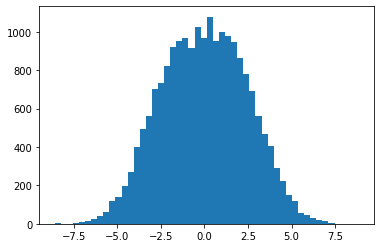

In [11]:
plt.hist(ens,bins=50)
plt.show()

In [12]:
ens

array([-8.59881663, -8.55367062, -8.39531275, ...,  7.60449032,
        8.5013107 ,  8.86308964])

In [13]:
Ensemble2=createEnsemble(10000,4)
Ensemble3=createEnsemble(10000,10)
ens2=compEig(Ensemble2)
ens3=compEig(Ensemble3)

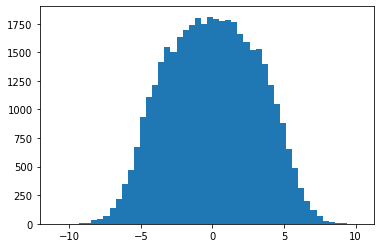

In [14]:
plt.hist(ens2,bins=50)
plt.show()

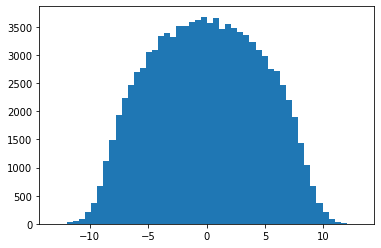

In [15]:
plt.hist(ens3,bins=50)
plt.show()

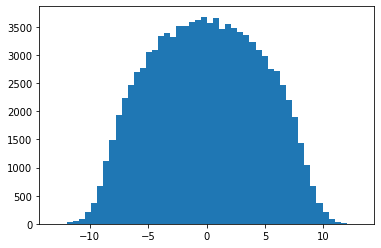

In [16]:
plt.hist(ens3,bins=50)
plt.show()

In [17]:
np.linalg.eigvals(H1)

array([-0.10944128, -0.76260118])

In [18]:
def cenEigenDiff(ensemble):
  N=ensemble.shape[1]
  ei=np.sort(np.linalg.eigvals(ensemble[0,:,:]))
  dif=np.array([ ei[N//2]-ei[N//2-1] ])
  for i in range(1,ensemble.shape[0]):
    ei1=np.sort(np.linalg.eigvals(ensemble[i,:,:]))
    dif1=np.array([ ei1[N//2]-ei1[N//2-1] ])
    dif=np.append(dif,dif1)

  return dif


In [19]:
difference=cenEigenDiff(Ensemble)

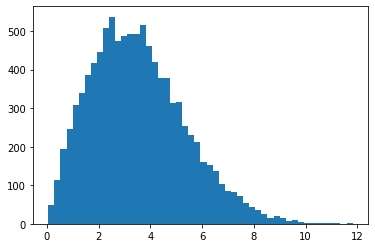

In [20]:
plt.hist(difference,bins=50)
plt.show()

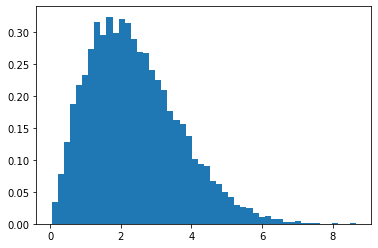

In [21]:
difference2=cenEigenDiff(Ensemble2)
plt.hist(difference2,bins=50,density=True)
plt.show()

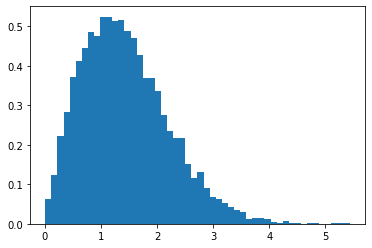

In [22]:
difference3=cenEigenDiff(Ensemble3)
plt.hist(difference3,bins=50,density=True)
plt.show()

In [23]:
def wigner(s):
  s1=np.arange(0,s,0.01)
  return (np.pi*s1/2)*np.exp(-np.pi*s1**2/4)

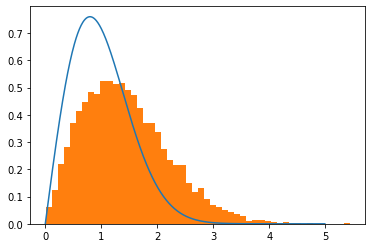

In [24]:
plt.plot(np.arange(0,5,0.01),wigner(5))
plt.hist(difference3,bins=50,density=True)
plt.show()

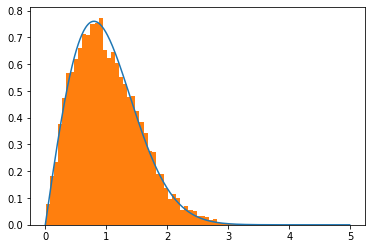

In [25]:
Ensemble4=createEnsemble(10000,20)
difference4=cenEigenDiff(Ensemble4)
plt.plot(np.arange(0,5,0.01),wigner(5))
plt.hist(difference4,bins=50,density=True)
plt.show()

In [26]:
Ensemble5=createEnsemble(10000,25)
difference5=cenEigenDiff(Ensemble4)

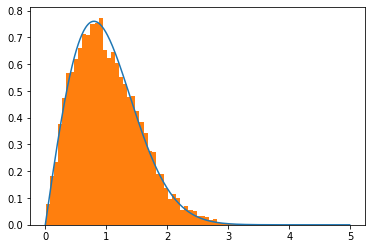

In [27]:
plt.plot(np.arange(0,5,0.01),wigner(5))
plt.hist(difference5,bins=50,density=True)
plt.show()